# Numerical Optimization and Large Scale Linear Algebra
**Assignment 1**

**Name : Maria Stamouli (p3351820)**

## 1. LU factorization (with example 4x4 matrix A)

### a. partial pivoting

In [1]:
# use scipy.linalg python implementation
from scipy.linalg import lu
import numpy as np

alpha = np.array([[2, 5, 10, 7], [5, 2, 12, 4], [7, 5, 6, 6], [5, 4, 4, 8]])

p,l,u = lu(alpha,permute_l = False)
print('The permutation matrix P is:\n',p)
print('The lower triangular matrix L is:\n',l)
print('The upper triangular matrix U is:\n',u)

Time for function of scipy: 0:00:00.004002
The permutation matrix P is:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
The lower triangular matrix L is:
 [[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571 -0.44        1.          0.        ]
 [ 0.71428571  0.12       -0.11267606  1.        ]]
The upper triangular matrix U is:
 [[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  8.28571429  5.28571429]
 [ 0.          0.         11.36        2.04      ]
 [ 0.          0.          0.          3.30985915]]


**Implementation with numpy only**

In [2]:
import numpy as np


def lu_decomposition_partial(A):
    
    n = len(A)
    A = A.astype('float64')
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    P = np.eye(n,n)
    piv = np.array(n)
    

    for j in range(n):

        row = max(range(j, n), key=lambda i: abs(A[i][j]))
        piv = np.append(piv,row)
        A[[j,row]] = A[[row,j]]
        P[[j,row]] = P[[row,j]]
        L[[j,row]] = L[[row,j]]

        L[j:,j] = A[j:,j] / A[j,j]
        U[j,0:] = A[j,0:]
        
        A[j+1:,:] = A[j+1:,:] - np.matmul(L[j+1:,j].reshape(n-j-1,1), A[j,:].reshape(1,n))
   

    U[:,-1] = A[:,-1] 
    P = P.T
    piv = piv[1:]
    return (P, L, U, piv)

In [3]:

print('The permutation matrix P is:\n',lu_decomposition_partial(alpha)[0])
print()
print('The lower triangular matrix L is:\n',lu_decomposition_partial(alpha)[1])
print()
print('The upper triangular matrix U is:\n',lu_decomposition_partial(alpha)[2])
print()

The permutation matrix P is:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

The lower triangular matrix L is:
 [[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571 -0.44        1.          0.        ]
 [ 0.71428571  0.12       -0.11267606  1.        ]]

The upper triangular matrix U is:
 [[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  8.28571429  5.28571429]
 [ 0.          0.         11.36        2.04      ]
 [ 0.          0.          0.          3.30985915]]

Time for partial pivoting: 0:00:00.005002


In [4]:
# check that factorization is right
lu = lu_decomposition_partial(alpha)[1].dot(lu_decomposition_partial(alpha)[2])
pa = lu_decomposition_partial(alpha)[0].T.dot(alpha)
print(np.allclose(lu,pa))

True


### b. full pivoting 

In [5]:
import numpy as np


def lu_decomposition_full(A):
       
    """
    This algorithm implements full pivoting in LU decomposition. 
    
    """

    n = len(A)
    A = A.astype('float64')
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    P = np.eye(n,n)
    Q = np.eye(n,n)

    for i in range(n-1):
        
        pivot = np.max(abs(A[i:, i:]))
        row = np.where(abs(A[i:,i:]) == pivot)[0][0]
        col = np.where(abs(A[i:,i:]) == pivot)[1][0]

        if i != 0:
            row = row + i
            col = col + i

        #swap rows in A:
        A[[i,row]] = A[[row,i]]
        A[:,[i,col]] = A[:,[col,i]]
        #swap rows in U:
        U[[i,row]] = U[[row,i]]
        U[:,[i,col]] = U[:,[col,i]]
        #swap rows in L:

        L[[i,row]] = L[[row,i]]
        L[:,[i,col]] = L[:,[col,i]]
        
        #swap rows in P:
        P[[i,row]] = P[[row,i]]
        
        #swap columns in Q
        Q[:,[i,col]] = Q[:,[col,i]]
        
        # devide all the elements of the column with the pivot and pass it to L
        L[i:,i] = A[i:,i] / A[i,i]
        
        U[i,0:] = A[i,0:]
        
        A[i+1:,:] = A[i+1:,:] - np.matmul(L[i+1:,i].reshape(n-i-1,1), A[i,:].reshape(1,n))
        
   
    U[:,-1] = A[:,-1]
    
    L[n-1,n-1] = 1
    
    return (P, Q, L, U)

In [6]:
# example with alpha array

print('The permutation matrix P is:\n',lu_decomposition_full(alpha)[0])
print()
print('The permutation matrix Q is:\n',lu_decomposition_full(alpha)[1])
print()
print('The lower triangular matrix L is:\n',lu_decomposition_full(alpha)[2])
print()
print('The upper triangular matrix U is:\n',lu_decomposition_full(alpha)[3])
print()

The permutation matrix P is:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

The permutation matrix Q is:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

The lower triangular matrix L is:
 [[ 1.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.        ]
 [ 0.83333333  0.55        1.          0.        ]
 [ 0.5         0.6        -0.625       1.        ]]

The upper triangular matrix U is:
 [[12.          4.          5.          2.        ]
 [ 0.          6.66666667  3.33333333  3.33333333]
 [ 0.          0.         -4.          1.5       ]
 [ 0.          0.          0.          2.9375    ]]

Time for full pivoting: 0:00:00.015007


In [7]:
# check that factorization is right
lu_full = lu_decomposition_full(alpha)[2].dot(lu_decomposition_full(alpha)[3])
paq = lu_decomposition_full(alpha)[0].dot(alpha).dot(lu_decomposition_full(alpha)[1])
print(np.allclose(lu_full,paq))

True


## 2. Solve equations

### Compute error and residual for:

**a. Partial Pivoting with scipy**

**b. Partial Pivoting**

**c. Full Pivoting**

#### (Note that we use the relative error/ relative residual for report)

In [8]:
def create_random_arrays(n,structure):
    """
    
    This function creates array of size nxn  or vector of size n
    
    """
    array_size = n
        
    if structure == 'matrix':
        A = np.random.rand(array_size,array_size)
    else:
        A = np.random.rand(array_size)

    return A

In [9]:
def create_unitary_vectors(n):
    
    vec = create_random_arrays(n,'vector') 
    vec = vec / np.linalg.norm(vec,2)
    
    return vec

In [10]:
def solve_partial(P,L,U,b):
    
    # 1. permutation
    pb = np.dot(P.T,b)
    # 2. Fwd substitution
    y = np.linalg.solve(L,pb)
    # 3. Bwd substitution
    x_bar = np.linalg.solve(U,y)
    
    return x_bar

In [11]:
def solve_full(P,Q,L,U,b):
    
    #1. permutation
    pb = np.dot(P,b)
    # 2. Fwd substitution
    y = np.linalg.solve(L,pb)
    z = np.linalg.solve(U,y)
    # 3. Bwd substitution
    x_bar = np.linalg.solve(Q.T,z)
    
    return x_bar

In [76]:
def sherman_morrison(P,L,U,b,u,v):
    
    """
    Solve Sherman-Morrison formula
    
    """
    start = time.process_time()
    # Solve Az = u
    z = solve_partial(P,L,U, u)
    # Solve Ay = b
    y = solve_partial(P,L,U, b)
    # calculate x
    x_bar = y - (np.dot(z ,np.dot(v.T, y)))/ (1+np.dot(v.T, z))
    print(time.process_time()-start)
    
    return x_bar

In [13]:
def solve_equations(A,b,x,method,sherman,n):
    
    """
    Returns the x bar using 3 different ways of solving or solves sherman morrison with partial pivoting.
    
    """
    from scipy.linalg import lu_factor,lu_solve
    
    if method == 'scipy':
            
        lu, piv = lu_factor(A)
        x_bar = lu_solve((lu, piv), b)

    elif method == 'partial':

        (P,L,U,piv) = lu_decomposition_partial(A)
        x_bar = solve_partial(P,L,U,b)

    else:

        (P,Q,L,U) = lu_decomposition_full(A)
        x_bar = solve_full(P,Q,L,U,b)

    if sherman == True:

        u = create_unitary_vectors(n)
        v = create_unitary_vectors(n)
        
        
        A = A + np.outer(u,v.T)
        b = A.dot(x)

        x_bar = sherman_morrison(P,L,U,b,u,v)
        
    return x_bar, A, b

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def compute_error_residual(n, method, special_conditions, sherman):
    
    """
    
    This function computes:
    
    1. error and relative error
    2. residual and relative residual
    3. matrix condition number
    
    for any random matrix or for matrix with specific structure (as discribed in question 3)
    or for sherman morrison formula matrix.
    
    """
    
    
    np.random.seed(0)
    
    rel_error = []
    error = []
    rel_residual = []
    residual = []
    cond_number = []
    
    if (sherman == True) & (method != 'partial'):
        
        print('Invalid combination of arguments!')
        return
    
    for i in range(5):
        # Create special or random array
        if special_conditions == True:
            
            A = np.ones((n,n))
            A = np.tril(A,-1)
            A[:,-1] = np.ones((n,))
            np.fill_diagonal(A,-1) 
            
        else:
            A = create_random_arrays(n,'matrix') 
               
        
        x = create_random_arrays(n,'vector')
        b = A.dot(x)
        
        x_bar, A, b = solve_equations(A, b, x, method=method, sherman=sherman, n=n)
                  
        # compute error and residual:
        
        residual.append(np.linalg.norm(A @ x_bar - b, np.inf))
        #rel_residual.append(np.linalg.norm(A @ x_bar - b, np.inf) / np.linalg.norm(b, np.inf))
        rel_residual.append(residual[i] / np.linalg.norm(b, np.inf))      
        
        
        error.append(np.linalg.norm((x_bar - x), np.inf))
        #rel_error.append(np.linalg.norm((x_bar - x), np.inf) / np.linalg.norm(x, np.inf))
        rel_error.append(error[i]/np.linalg.norm(x, np.inf))
        
        cond_number.append(np.linalg.cond(A, np.inf))       
    
        print('Linear System:', i+1)
        print()
        print('The error of system', i+1, 'is:                    ', error[i])
        print('The relative error of system', i+1, 'is:           ', rel_error[i])
        print('The residual of system', i+1, 'is:                 ', residual[i])
        print('The relative residual of system', i+1, 'is:        ', rel_residual[i])
        print('The condition number of matrix', i+1, 'is:         ', cond_number[i])
        print('-----------------------------------------------------------------------------------------------')
        
    mean_error = np.mean(error)
    mean_rel_error = np.mean(rel_error)
    mean_residual = np.mean(residual)
    mean_rel_residual = np.mean(rel_residual)
    mean_cond_number = np.mean(cond_number)

    
    print("The mean error of",method,"pivoting for n=",n, 'is:                    ', mean_error)
    print("The mean relative error of",method,"pivoting for n=",n, 'is:           ', mean_rel_error)
    print("The mean residual of",method,"pivoting for n=",n, 'is:                 ', mean_residual)
    print("The mean relative residual of",method,"pivoting for n=",n, 'is:        ', mean_rel_residual)
    print("The mean condition number of matrices",n, 'is:                         ', mean_cond_number)
    

In [15]:
# print results for all sizes
import time

size = [64, 128, 256, 512, 1024, 2048]
#size = [64, 128, 256, 512, 1024]

time_scipy = []
time_partial=[]
time_full = []

for s in size:
    
    
    #start = time.time()
    start = time.process_time()

    print('===============MATRIX DIMENSION:',s,'========================================================================')
    print()
    print('-----------PARTIAL WITH SCIPY-----------------------------------------------------------------------')
    print()
    compute_error_residual(s,'scipy', False, False)
    print()
    #time_scipy.append(time.time()-start)
    time_scipy.append(time.process_time()-start)

    print('Time for solving 5 different linear systems with partial pivoting of scipy', time_scipy)
    print()
    
    
    #start = time.time()
    start = time.process_time()

    print('-----------PARTIAL PIVOTING--------------------------------------------------------------------------')
    print()
    compute_error_residual(s,'partial',False, False)
    print()
    #time_partial.append(time.time()-start)
    time_partial.append(time.process_time()-start)
    print('Time for solving 5 different linear systems with partial pivoting',time_partial)
    print()
    
    #start = time.time()
    start = time.process_time()
    print('------------FULL PIVOTING----------------------------------------------------------------------------')
    compute_error_residual(s,'full',False, False)
    print()
    #time_full.append(time.time()-start)
    time_full.append(time.process_time()-start)

    print('Time for solving 5 different linear systems with full pivoting', time_full)
    print()

===============MATRIX DIMENSION: 64 ========================================================================

-----------PARTIAL WITH SCIPY-----------------------------------------------------------------------

Linear System: 1

The error of system 1 is:                     1.509903313490213e-14
The relative error of system 1 is:            1.5503632071569004e-14
The residual of system 1 is:                  1.4210854715202004e-14
The relative residual of system 1 is:         7.470108786708243e-16
The condition number of matrix 1 is:          1940.164578557338
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     2.020605904817785e-14
The relative error of system 2 is:            2.0695702443183638e-14
The residual of system 2 is:                  5.329070518200751e-15
The relative residual of system 2 is:         3.059557844011279e-16
The condition number of matrix 2 is:         

The mean relative residual of full pivoting for n= 64 is:         4.750539841201549e-16
The mean condition number of matrices 64 is:                          2305.6180301419795

Time for scipy solving 5 different linear systems with full pivoting [0.1875]

===============MATRIX DIMENSION: 128 ========================================================================

-----------PARTIAL WITH SCIPY-----------------------------------------------------------------------

Linear System: 1

The error of system 1 is:                     1.2156942119645464e-13
The relative error of system 1 is:            1.228339712748321e-13
The residual of system 1 is:                  2.842170943040401e-14
The relative residual of system 1 is:         7.465810283964151e-16
The condition number of matrix 1 is:          8564.992012077946
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     3.4194869158454

Linear System: 1

The error of system 1 is:                     9.575951143148131e-13
The relative error of system 1 is:            9.596489740198e-13
The residual of system 1 is:                  8.526512829121202e-14
The relative residual of system 1 is:         1.1402464871154942e-15
The condition number of matrix 1 is:          96300.46992778135
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     1.4355183708403274e-13
The relative error of system 2 is:            1.4388762505647936e-13
The residual of system 2 is:                  1.2789769243681803e-13
The relative residual of system 2 is:         1.6969859382419242e-15
The condition number of matrix 2 is:          30439.681373962227
-----------------------------------------------------------------------------------------------
Linear System: 3

The error of system 3 is:                     9.275913370743183e-14
The relativ

Linear System: 3

The error of system 3 is:                     2.2714052860806078e-12
The relative error of system 3 is:            2.273280230726038e-12
The residual of system 3 is:                  3.979039320256561e-13
The relative residual of system 3 is:         2.8137289590469498e-15
The condition number of matrix 3 is:          425894.50660363695
-----------------------------------------------------------------------------------------------
Linear System: 4

The error of system 4 is:                     3.6648462042876417e-13
The relative error of system 4 is:            3.665422502003411e-13
The residual of system 4 is:                  3.979039320256561e-13
The relative residual of system 4 is:         2.7698261403322416e-15
The condition number of matrix 4 is:          41253.37250034723
-----------------------------------------------------------------------------------------------
Linear System: 5

The error of system 5 is:                     3.6221026178395732e-12
The rela

Linear System: 2

The error of system 2 is:                     1.8558488079634117e-12
The relative error of system 2 is:            1.8558879417257516e-12
The residual of system 2 is:                  1.1937117960769683e-12
The relative residual of system 2 is:         4.3480239858390964e-15
The condition number of matrix 2 is:          144081.30711586066
-----------------------------------------------------------------------------------------------
Linear System: 3

The error of system 3 is:                     2.599365167554879e-12
The relative error of system 3 is:            2.6044326681905777e-12
The residual of system 3 is:                  1.0800249583553523e-12
The relative residual of system 3 is:         3.8825114166682434e-15
The condition number of matrix 3 is:          194711.34347961817
-----------------------------------------------------------------------------------------------
Linear System: 4

The error of system 4 is:                     4.5192793951542853e-11
The 

Linear System: 1

The error of system 1 is:                     4.5349488053680886e-11
The relative error of system 1 is:            4.536188782110629e-11
The residual of system 1 is:                  5.115907697472721e-12
The relative residual of system 1 is:         9.581269661259952e-15
The condition number of matrix 1 is:          22484713.919582505
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     1.944044925039634e-11
The relative error of system 2 is:            1.9464265876584737e-11
The residual of system 2 is:                  4.888534022029489e-12
The relative residual of system 2 is:         9.289758874107147e-15
The condition number of matrix 2 is:          1710746.8520554213
-----------------------------------------------------------------------------------------------
Linear System: 3

The error of system 3 is:                     3.2912915448601865e-11
The relat

## Compare performance with matrix size for each method (random matrices)

In [83]:
def plot_performance(size,time_partial,time_full):

    from scipy.interpolate import interp1d
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("whitegrid")
    # interpolate line
    
    xx = [0.1,300,600,900,1200,1500,1800,2000]
    xx = np.log(np.asarray(xx))
    size = np.log(np.asarray(size))
    size_new = np.linspace(min(size), max(size),500)
    f1 = interp1d(size, np.log(np.asarray(time_partial)), kind='linear')
    f2 = interp1d(size, np.log(np.asarray(time_full)), kind='linear')

    time_partial_smooth = f1(size_new)
    time_full_smooth = f2(size_new)


    plt.figure(figsize=(15,10))
    plt.title('Performance (CPU time) vs matrix size',fontsize=18)
    
    #plt.xticks([0,300,600,900,1200,1500,1800,2000])
    plt.xticks(xx)
    plt.xlabel('matrix size n',fontsize=18)
    plt.ylabel('CPU time (sec.)',fontsize=18)
    plt.plot(size_new,time_partial_smooth)
    plt.plot(size_new,time_full_smooth)
    #X = range(0,500)
    #y = [x**2 for x in X]
    #plt.plot(X,y)
    plt.scatter(size,np.log(np.asarray(time_partial)),marker='o',s=500)
    plt.scatter(size,np.log(np.asarray(time_full)),marker='o',s=500,cmap='r')
    plt.legend(('time partial','time full'),loc=2,fontsize=15)

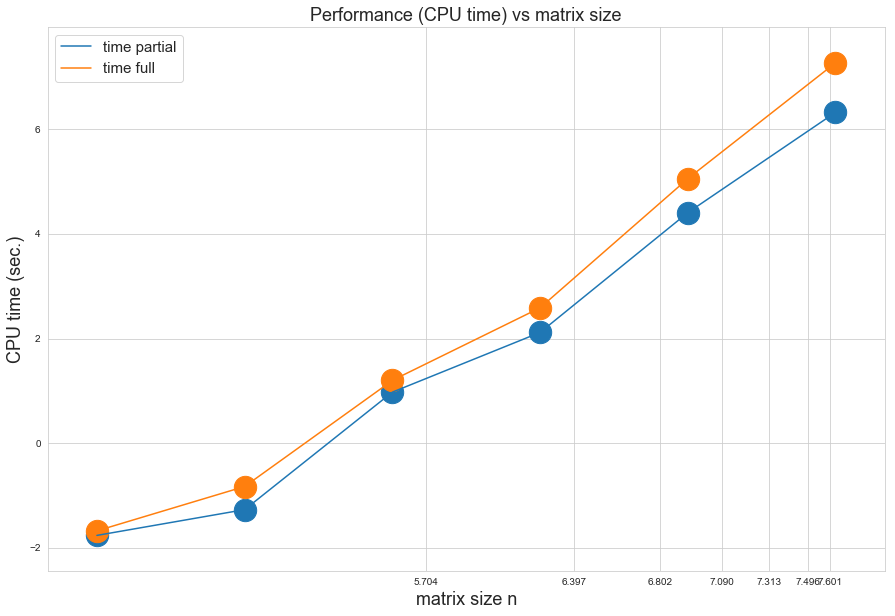

In [84]:
plot_performance(size,time_partial,time_full)

## Question 3 (special conditions)


In [18]:
# print results for all sizes
size = [64, 128, 256, 512, 1024, 2048]
import time

time_scipy_ = []
time_partial_=[]
time_full_ = []

for s in size:
    
    #start = time.time()
    start = time.process_time()
    print('===============Special Condition:MATRIX DIMENSION:',s,'=======================================================')
    print()
    print('-----------PARTIAL WITH SCIPY-----------------------------------------------------------------------')
    print()
    compute_error_residual(s,'scipy',True, False)
    print()
    #time_scipy_.append(time.time()-start)
    time_scipy_.append(time.process_time()-start)
    print('Time for scipy solving 5 different linear systems with partial pivoting of scipy', time_scipy_)
    print()

    #start = time.time()
    start = time.process_time()
    print('-----------PARTIAL PIVOTING--------------------------------------------------------------------------')
    print()
    compute_error_residual(s,'partial',True, False)
    print()
    #time_partial_.append(time.time()-start)
    time_partial_.append(time.process_time()-start)

    print('Time for partial solving 5 different linear systems with partial pivoting', time_partial_)
    print()
    
    #start = time.time()
    start = time.process_time()
    print('------------FULL PIVOTING----------------------------------------------------------------------------')
    compute_error_residual(s,'full',True, False)
    print()
    #time_full_.append(time.time()-start)
    time_full_.append(time.process_time()-start)
    print('Time for full solving 5 different linear systems with full pivoting', time_full_)

===============Special Condition:MATRIX DIMENSION: 64 =======================================================

-----------PARTIAL WITH SCIPY-----------------------------------------------------------------------

Linear System: 1

The error of system 1 is:                     0.6563295894652734
The relative error of system 1 is:            0.6640499416233479
The residual of system 1 is:                  3.2603461800183773
The relative residual of system 1 is:         0.10261603777469233
The condition number of matrix 1 is:          64.0
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     3.2747457201803596
The relative error of system 2 is:            3.352657840053334
The residual of system 2 is:                  6.861038140184313
The relative residual of system 2 is:         0.21631607605453457
The condition number of matrix 2 is:          64.0
---------------------------------

Linear System: 4

The error of system 4 is:                     0.9944007896476794
The relative error of system 4 is:            1.0
The residual of system 4 is:                  39.433224349972505
The relative residual of system 4 is:         0.6332022787529731
The condition number of matrix 4 is:          128.0
-----------------------------------------------------------------------------------------------
Linear System: 5

The error of system 5 is:                     0.9992779939221711
The relative error of system 5 is:            1.0
The residual of system 5 is:                  38.6916857271226
The relative residual of system 5 is:         0.6031869102880868
The condition number of matrix 5 is:          128.0
-----------------------------------------------------------------------------------------------
The mean error of partial pivoting for n= 128 is:                     205.44674691128913
The mean relative error of partial pivoting for n= 128 is:            209.2380580550142
The

Linear System: 4

The error of system 4 is:                     0.9998085781169653
The relative error of system 4 is:            1.0
The residual of system 4 is:                  100.7408550641261
The relative residual of system 4 is:         0.7984002058647326
The condition number of matrix 4 is:          256.0
-----------------------------------------------------------------------------------------------
Linear System: 5

The error of system 5 is:                     0.9979940009356586
The relative error of system 5 is:            1.0
The residual of system 5 is:                  107.93974885652602
The relative residual of system 5 is:         0.8248336608281985
The condition number of matrix 5 is:          256.0
-----------------------------------------------------------------------------------------------
The mean error of partial pivoting for n= 256 is:                     0.9980656738380682
The mean relative error of partial pivoting for n= 256 is:            1.0
The mean residua

Linear System: 4

The error of system 4 is:                     3.626945470694797
The relative error of system 4 is:            3.6322973786223454
The residual of system 4 is:                  218.19168659545463
The relative residual of system 4 is:         0.8545221921431894
The condition number of matrix 4 is:          512.0
-----------------------------------------------------------------------------------------------
Linear System: 5

The error of system 5 is:                     0.9961004403012381
The relative error of system 5 is:            1.0
The residual of system 5 is:                  233.10292921786925
The relative residual of system 5 is:         0.8873885847825044
The condition number of matrix 5 is:          512.0
-----------------------------------------------------------------------------------------------
The mean error of partial pivoting for n= 512 is:                     1.5239448566877936
The mean relative error of partial pivoting for n= 512 is:            1.526

Linear System: 4

The error of system 4 is:                     0.9999311470188161
The relative error of system 4 is:            1.0
The residual of system 4 is:                  465.8988873288971
The relative residual of system 4 is:         0.9445795689708286
The condition number of matrix 4 is:          1024.0
-----------------------------------------------------------------------------------------------
Linear System: 5

The error of system 5 is:                     0.999956612757725
The relative error of system 5 is:            1.0
The residual of system 5 is:                  473.11641302175303
The relative residual of system 5 is:         0.9454591887634332
The condition number of matrix 5 is:          1024.0
-----------------------------------------------------------------------------------------------
The mean error of partial pivoting for n= 1024 is:                     0.9996373868288926
The mean relative error of partial pivoting for n= 1024 is:            1.0
The mean resi

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in subtract
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Linear System: 1

The error of system 1 is:                     nan
The relative error of system 1 is:            nan
The residual of system 1 is:                  nan
The relative residual of system 1 is:         nan
The condition number of matrix 1 is:          inf
-----------------------------------------------------------------------------------------------
Linear System: 2

The error of system 2 is:                     nan
The relative error of system 2 is:            nan
The residual of system 2 is:                  nan
The relative residual of system 2 is:         nan
The condition number of matrix 2 is:          inf
-----------------------------------------------------------------------------------------------
Linear System: 3

The error of system 3 is:                     nan
The relative error of system 3 is:            nan
The residual of system 3 is:                  nan
The relative residual of system 3 is:         nan
The condition number of matrix 3 is:          inf
----

## Compare performance with matrix size for each method (special conditions)

Text(0.5, 1.0, 'Performance (CPU time) vs matrix size -- Special conditions')

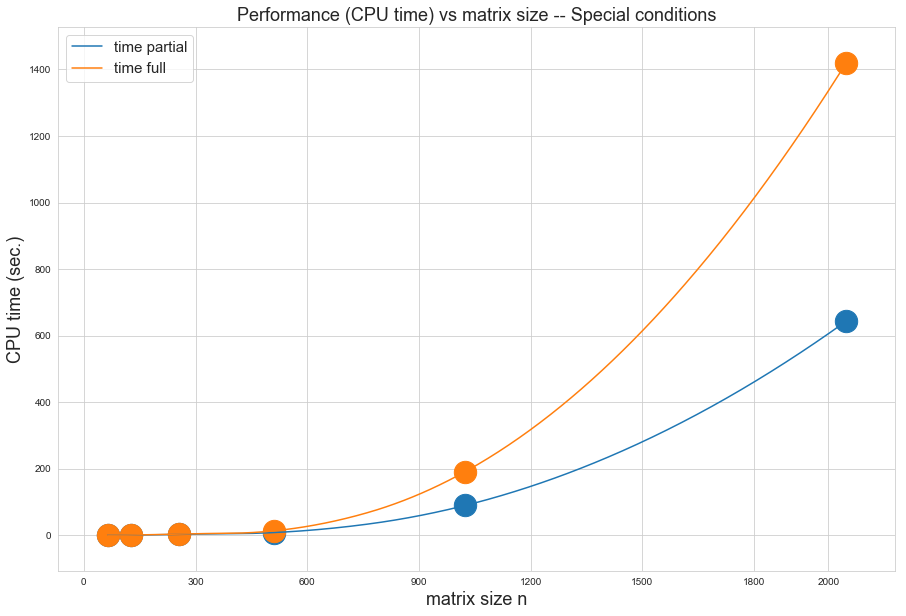

In [19]:
plot_performance(size,time_partial_,time_full_)
plt.title('Performance (CPU time) vs matrix size -- Special conditions',fontsize=18)

## Question 4

In [20]:
size = [64, 128, 256, 512, 1024, 2048]
time_sherman = []

for s in size:

    
    #start = time.time()
    start = time.process_time()
    print('-----------PARTIAL PIVOTING--------------------------------------------------------------------------')
    print()
    compute_error_residual(s, method = 'partial', special_conditions = False, sherman = True)
    print()
    #time_sherman.append(time.time()-start)
    time_sherman.append(time.process_time()-start)
    print('Time for partial solving 5 different linear systems with partial pivoting', time_sherman)
    print()

-----------PARTIAL PIVOTING--------------------------------------------------------------------------

0:00:00.083053
Linear System: 1

The error of system 1 is:                     3.608224830031759e-14
The relative error of system 1 is:            3.704912075926416e-14
The residual of system 1 is:                  1.4210854715202004e-14
The relative residual of system 1 is:         7.37242153941128e-16
The condition number of matrix 1 is:          1849.5155117577174
-----------------------------------------------------------------------------------------------
0:00:00
Linear System: 2

The error of system 2 is:                     9.00390872971002e-14
The relative error of system 2 is:            9.179616961350448e-14
The residual of system 2 is:                  1.4210854715202004e-14
The relative residual of system 2 is:         6.465943506515891e-16
The condition number of matrix 2 is:          5891.123447103714
---------------------------------------------------------------------

0:00:00.022015
Linear System: 1

The error of system 1 is:                     1.9629853298397393e-12
The relative error of system 1 is:            1.9725061222520206e-12
The residual of system 1 is:                  5.542233338928781e-13
The relative residual of system 1 is:         4.025566155387279e-15
The condition number of matrix 1 is:          344839.35882654844
-----------------------------------------------------------------------------------------------
0:00:00.025017
Linear System: 2

The error of system 2 is:                     4.1178171983347056e-13
The relative error of system 2 is:            4.144535398499209e-13
The residual of system 2 is:                  3.979039320256561e-13
The relative residual of system 2 is:         2.945408172658063e-15
The condition number of matrix 2 is:          23356.229901203595
-----------------------------------------------------------------------------------------------
0:00:00.023015
Linear System: 3

The error of system 3 is:       

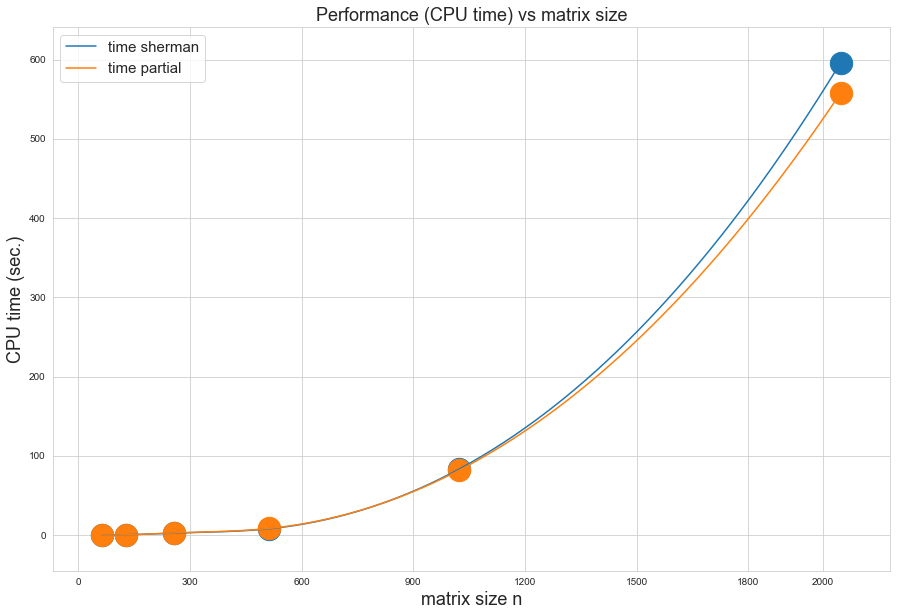

In [75]:
plot_performance(size,time_sherman,time_partial)
plt.legend(('time sherman','time partial'),loc=2,fontsize=15)